In [1]:
# Clone the YOLOv5 repository (if not already done)
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install YOLOv5 dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16675, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 16675 (delta 98), reused 127 (delta 59), pack-reused 16459
Receiving objects: 100% (16675/16675), 15.37 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (11397/11397), done.
/home/arismita/ML/jupyter/yolov5/yolov5


In [3]:
# Train the model
!python train.py --img 640 --batch 16 --epochs 100 --data /home/arismita/ML/yolov5_training/landcover/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name yolo_lessgo


train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/home/arismita/ML/yolov5_training/landcover/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_lessgo, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, w

In [5]:
!pip install pandas

In [8]:
import pandas as pd

# Load training results from CSV
results = pd.read_csv('runs/train/yolo_lessgo/results.csv')

# Display the first few rows and the column names
print(results.head())
print(results.columns)


                  epoch        train/box_loss        train/obj_loss  \
0                     0               0.12276               0.56844   
1                     1               0.10786               0.69170   
2                     2               0.10430               0.72732   
3                     3               0.10307               0.74438   
4                     4               0.10181               0.75289   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.056445              0.047862              0.028014   
1              0.046080              0.105490              0.056466   
2              0.043334              0.135990              0.094222   
3              0.041795              0.174660              0.102490   
4              0.040719              0.179470              0.107420   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0              0.028136              0.010450              0.112080   
1   

In [9]:
 import pandas as pd

# Load training results from CSV and strip leading/trailing spaces from column names
results = pd.read_csv('runs/train/yolo_lessgo/results.csv')
results.columns = results.columns.str.strip()

# Display the first few rows and the cleaned column names
print(results.head())
print(results.columns)


   epoch  train/box_loss  train/obj_loss  train/cls_loss  metrics/precision  \
0      0         0.12276         0.56844        0.056445           0.047862   
1      1         0.10786         0.69170        0.046080           0.105490   
2      2         0.10430         0.72732        0.043334           0.135990   
3      3         0.10307         0.74438        0.041795           0.174660   
4      4         0.10181         0.75289        0.040719           0.179470   

   metrics/recall  metrics/mAP_0.5  metrics/mAP_0.5:0.95  val/box_loss  \
0        0.028014         0.028136              0.010450      0.112080   
1        0.056466         0.070937              0.030876      0.104260   
2        0.094222         0.104020              0.049235      0.101620   
3        0.102490         0.129760              0.067325      0.100190   
4        0.107420         0.138020              0.071959      0.099176   

   val/obj_loss  val/cls_loss     x/lr0     x/lr1     x/lr2  
0       0.56471   

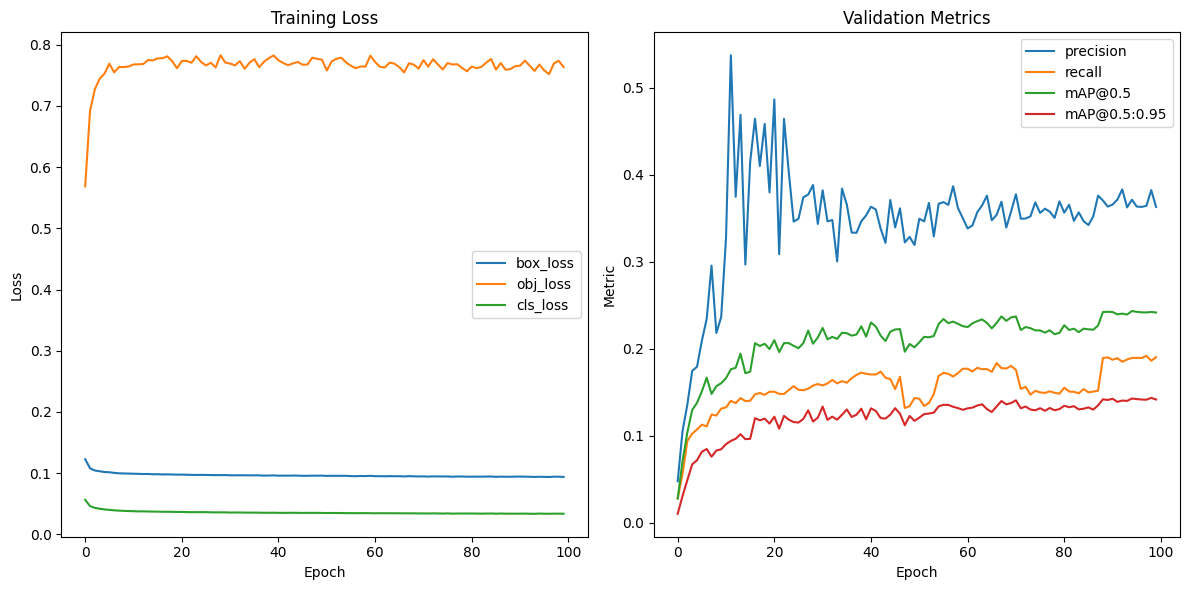

In [10]:
import matplotlib.pyplot as plt

# Column names after stripping spaces
epoch_col = 'epoch'
box_loss_col = 'train/box_loss'
obj_loss_col = 'train/obj_loss'
cls_loss_col = 'train/cls_loss'
precision_col = 'metrics/precision'
recall_col = 'metrics/recall'
map_05_col = 'metrics/mAP_0.5'
map_05_095_col = 'metrics/mAP_0.5:0.95'

# Plot training results
plt.figure(figsize=(12, 6))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(results[epoch_col], results[box_loss_col], label='box_loss')
plt.plot(results[epoch_col], results[obj_loss_col], label='obj_loss')
plt.plot(results[epoch_col], results[cls_loss_col], label='cls_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot metrics
plt.subplot(1, 2, 2)
plt.plot(results[epoch_col], results[precision_col], label='precision')
plt.plot(results[epoch_col], results[recall_col], label='recall')
plt.plot(results[epoch_col], results[map_05_col], label='mAP@0.5')
plt.plot(results[epoch_col], results[map_05_095_col], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Validation Metrics')
plt.legend()

plt.tight_layout()
plt.show()


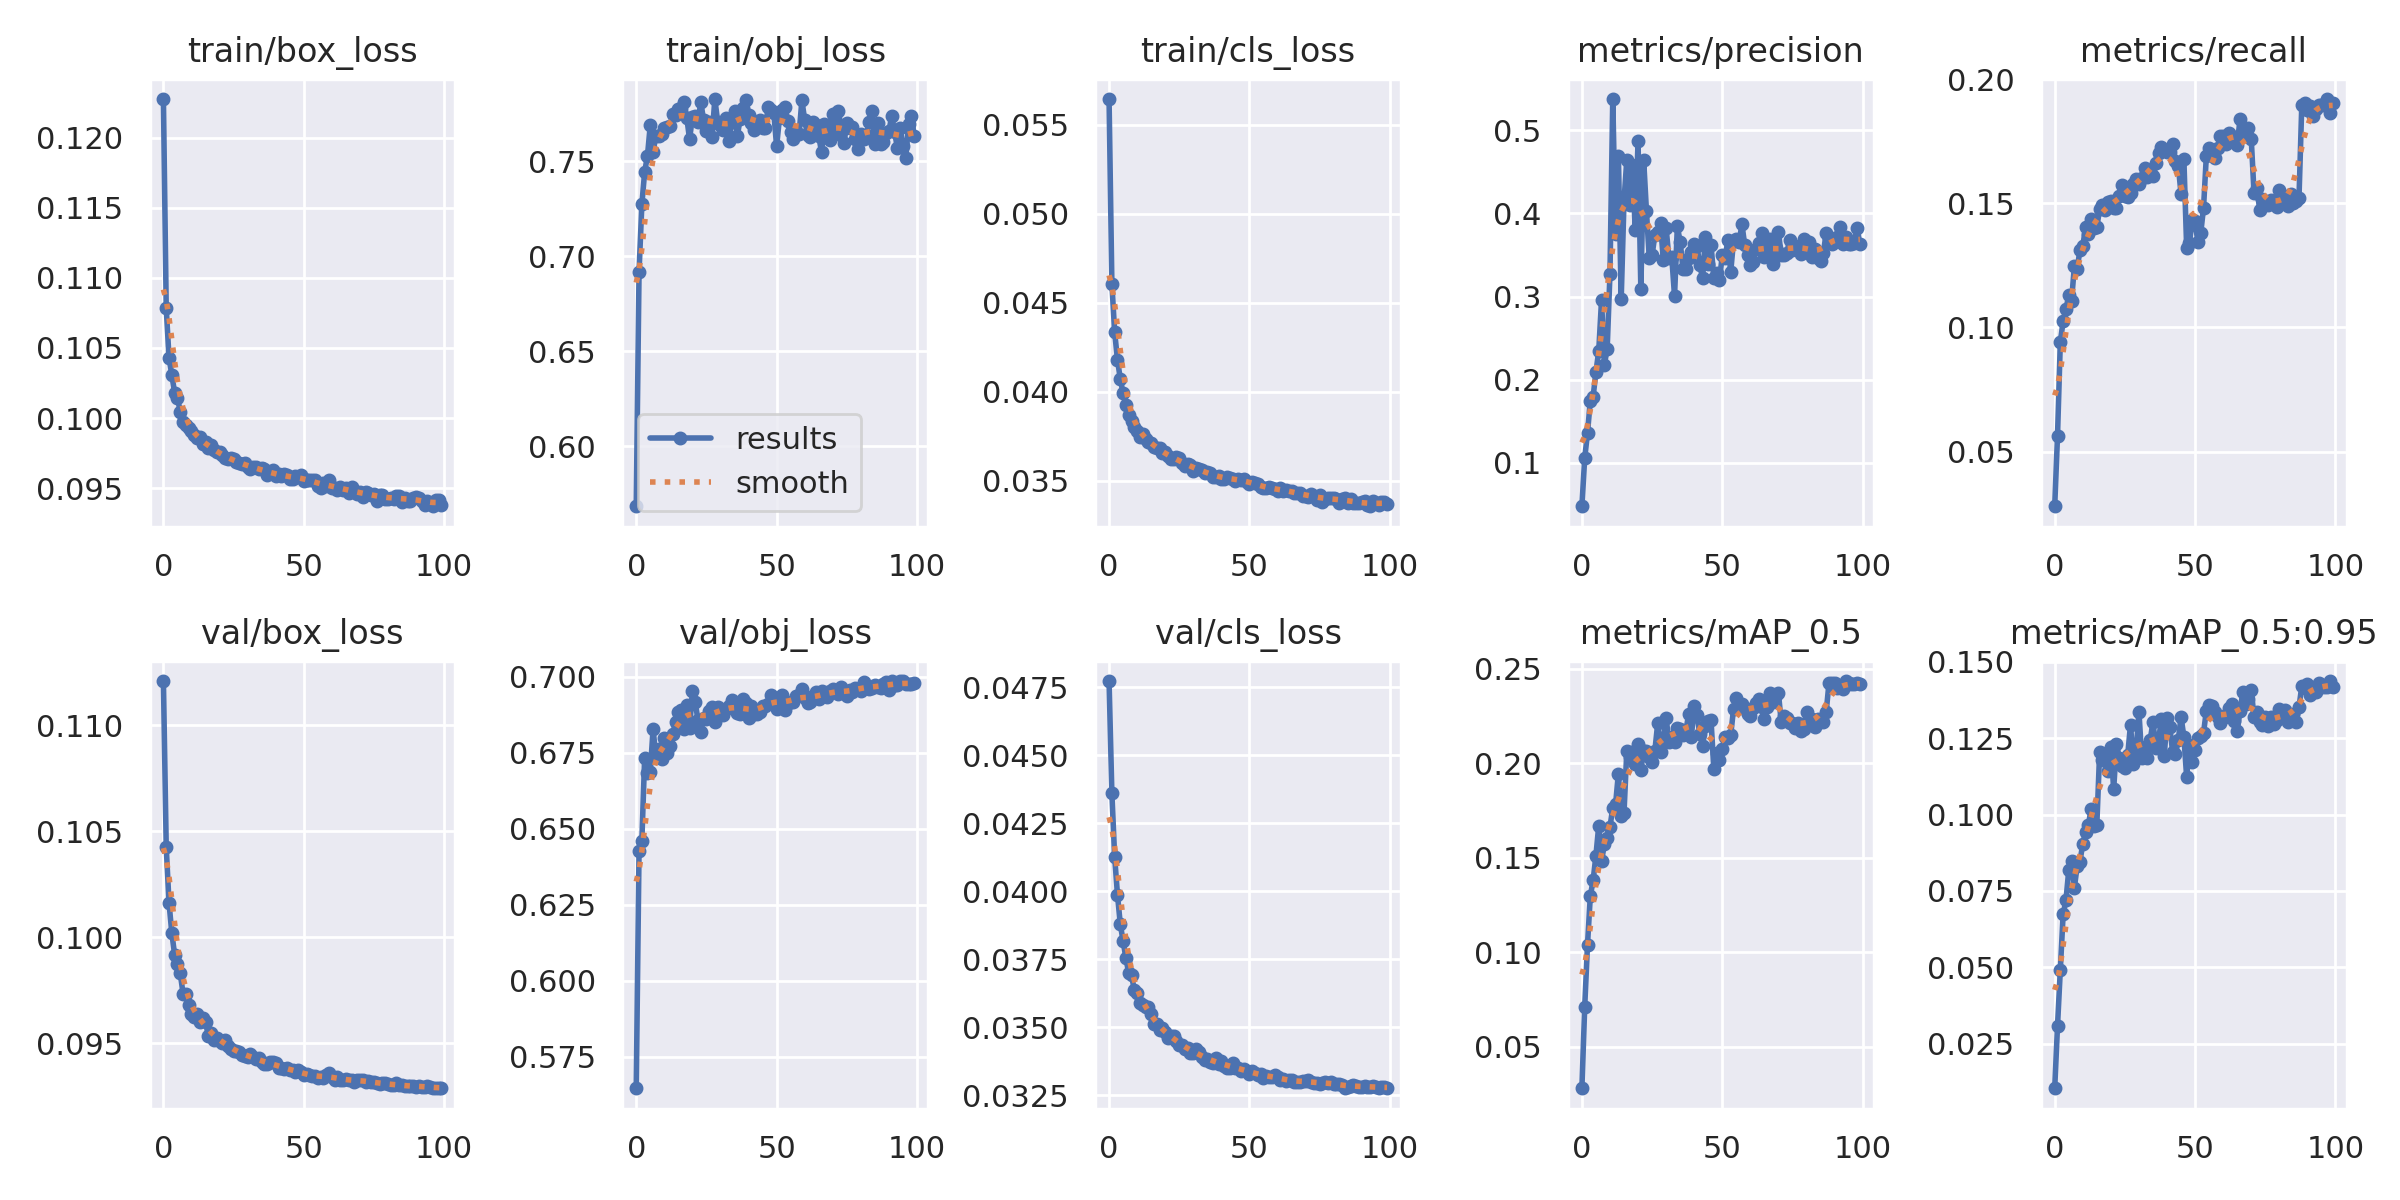

In [12]:
from IPython.display import Image, display

# Display the results.png image
display(Image(filename='runs/train/yolo_lessgo/results.png'))


detect: weights=['runs/train/yolo_lessgo/weights/best.pt'], source=/home/arismita/Downloads/k1.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/arismita/Downloads/k1.jpeg: 352x640 2 Ranges, 7 Buildings, 70.0ms
Speed: 0.6ms pre-process, 70.0ms inference, 148.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


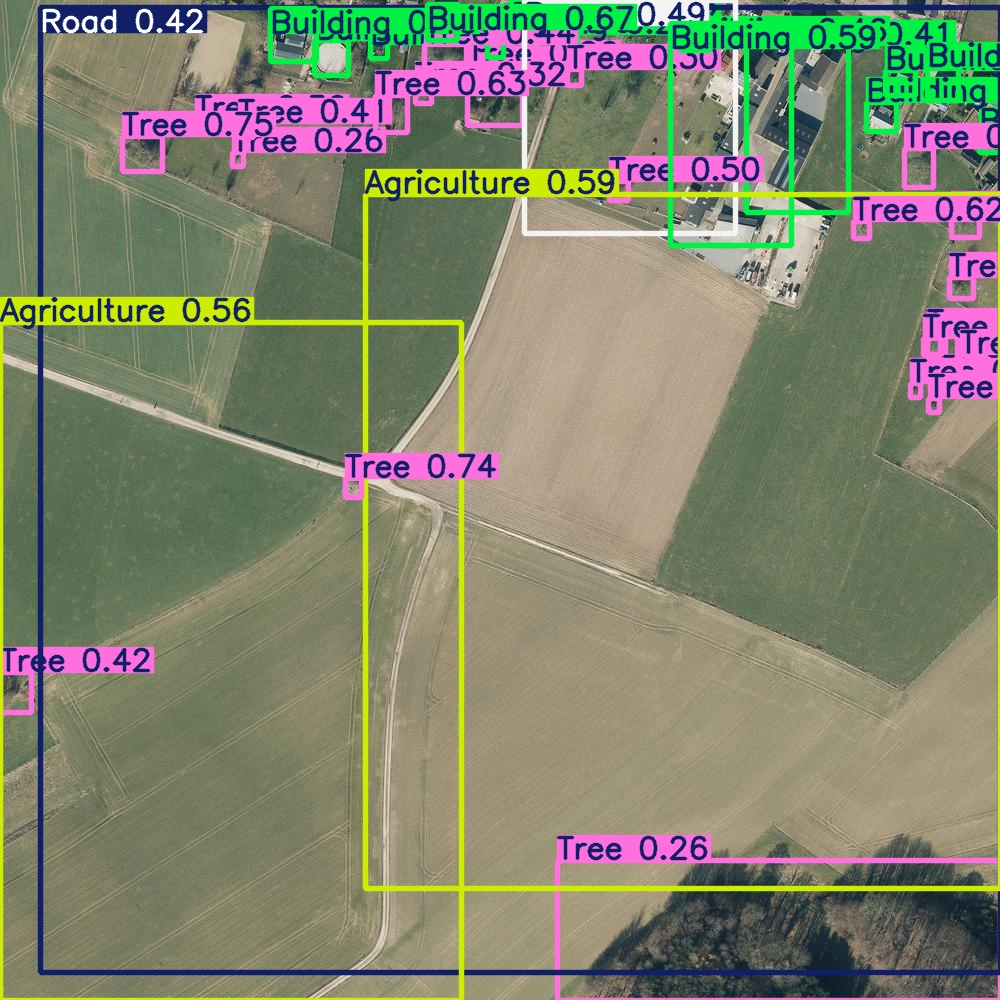

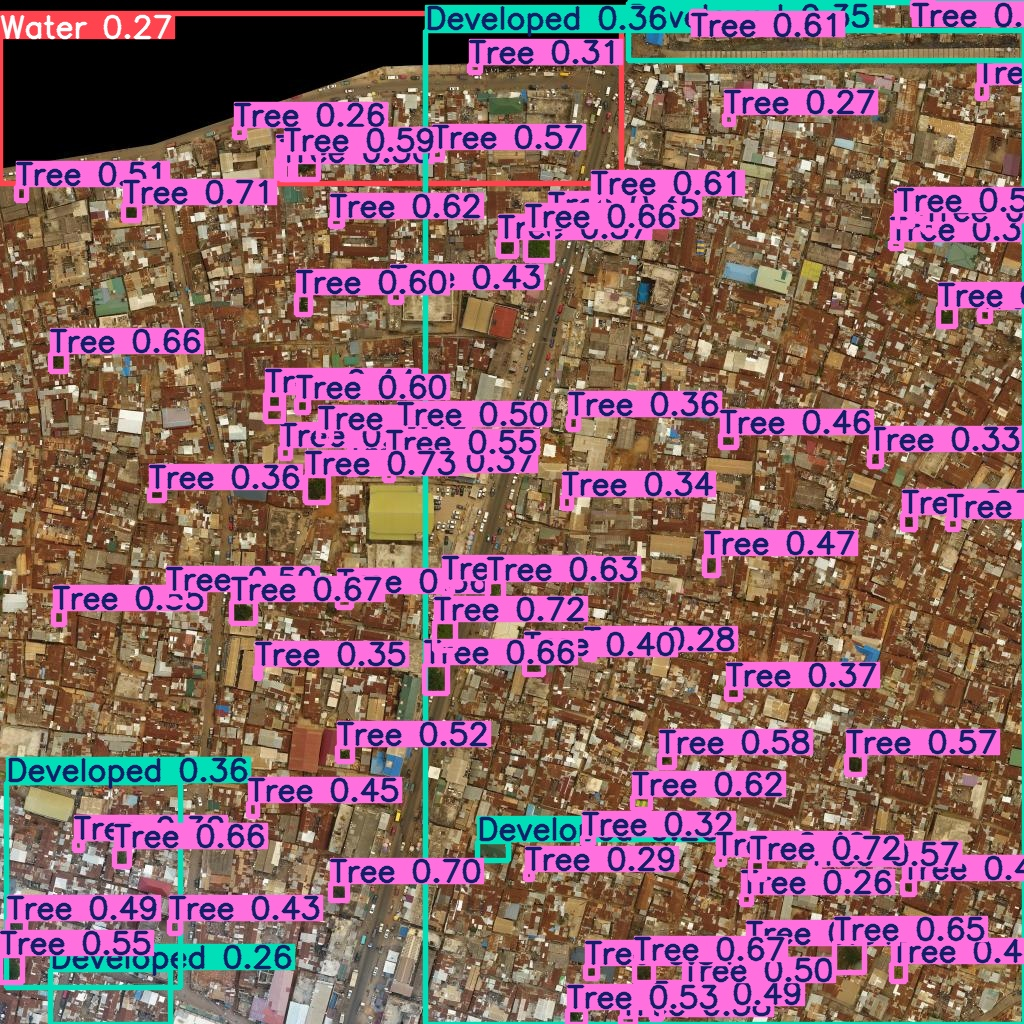

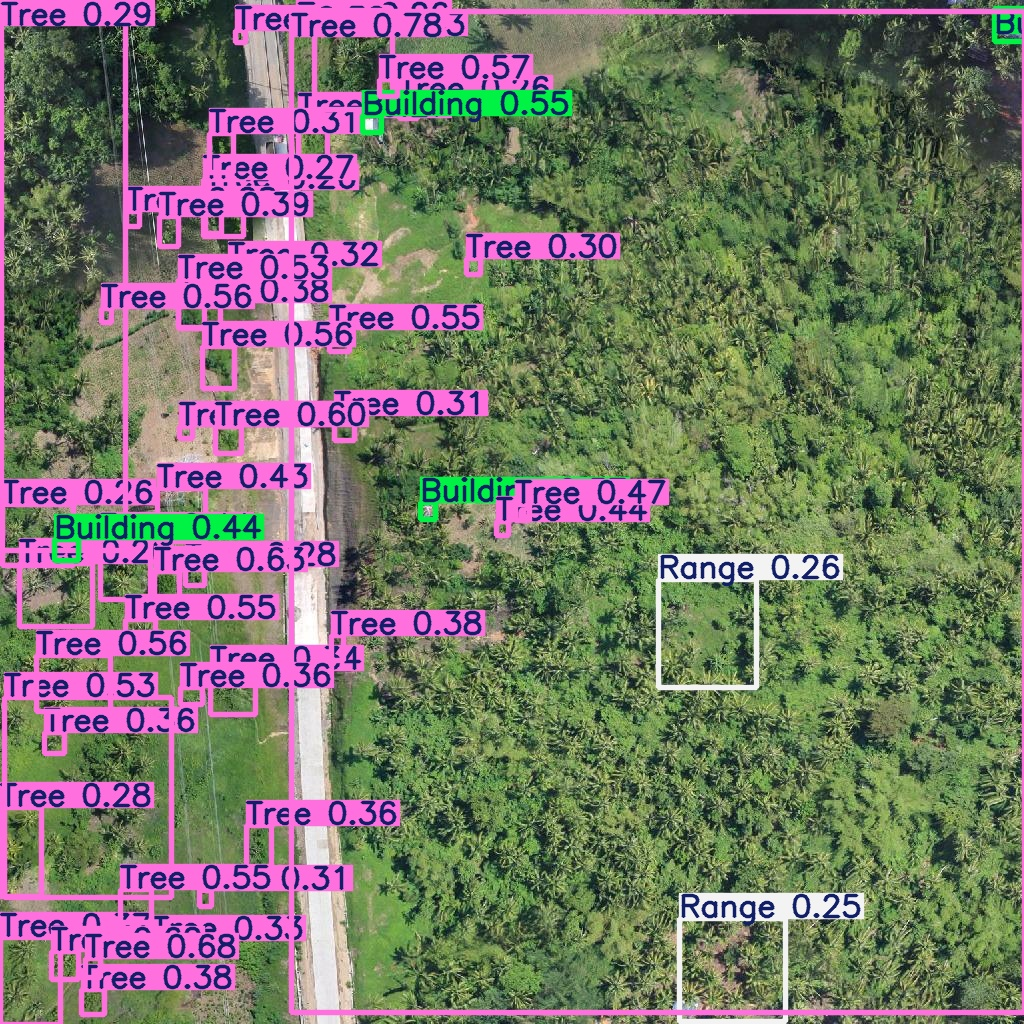

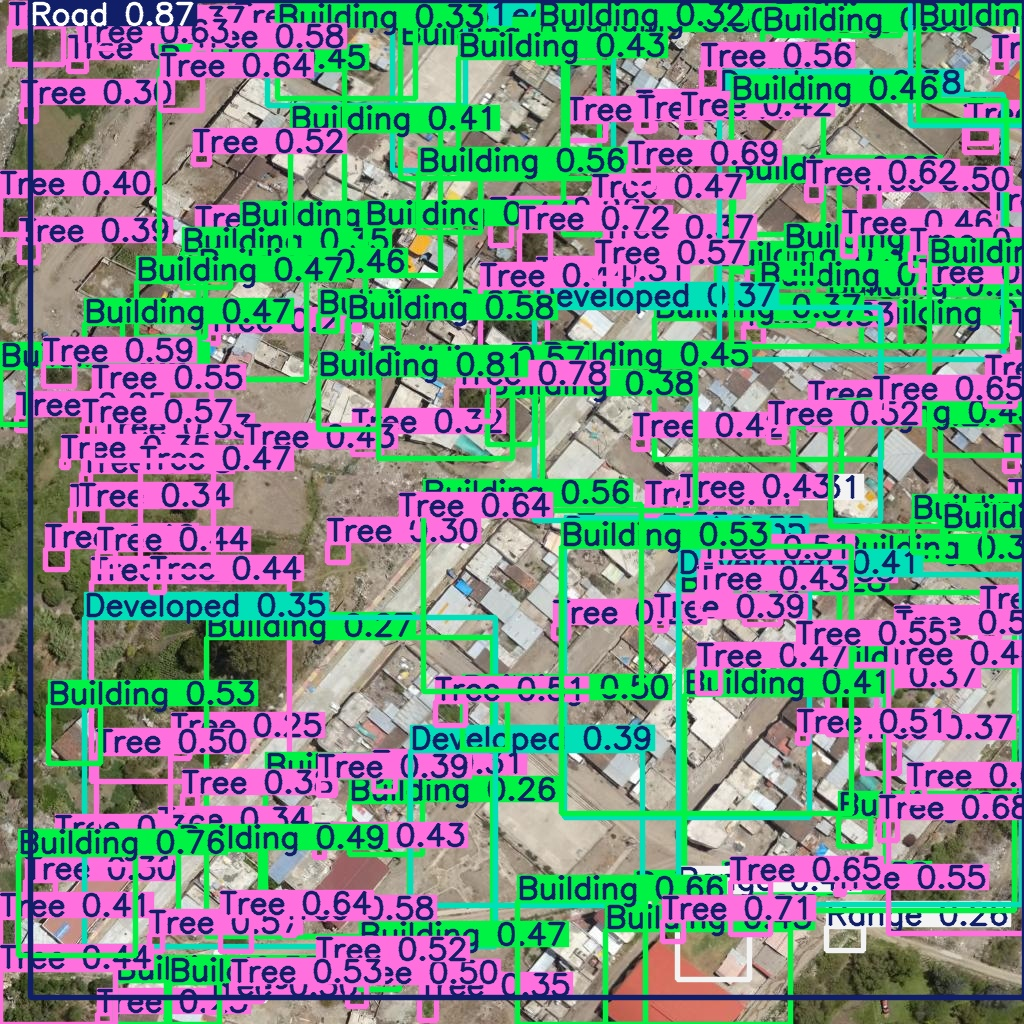

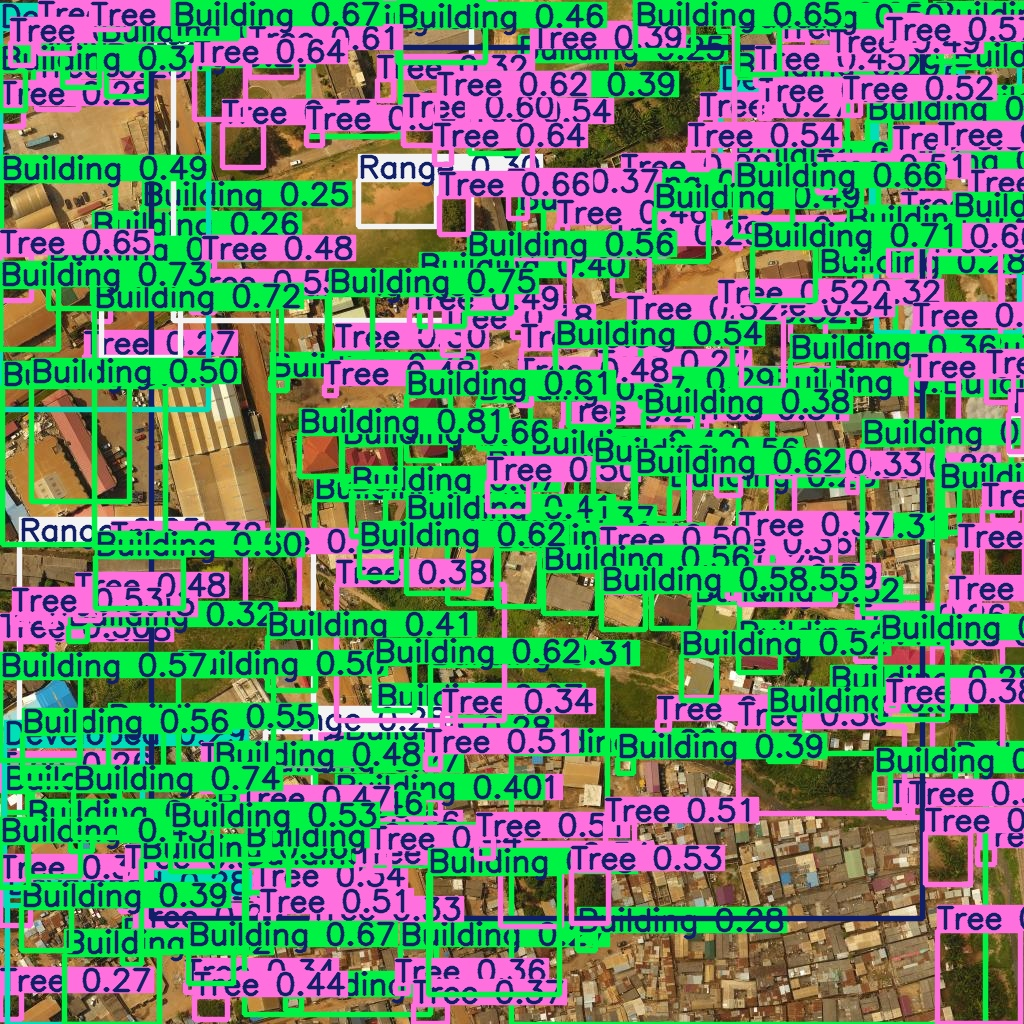

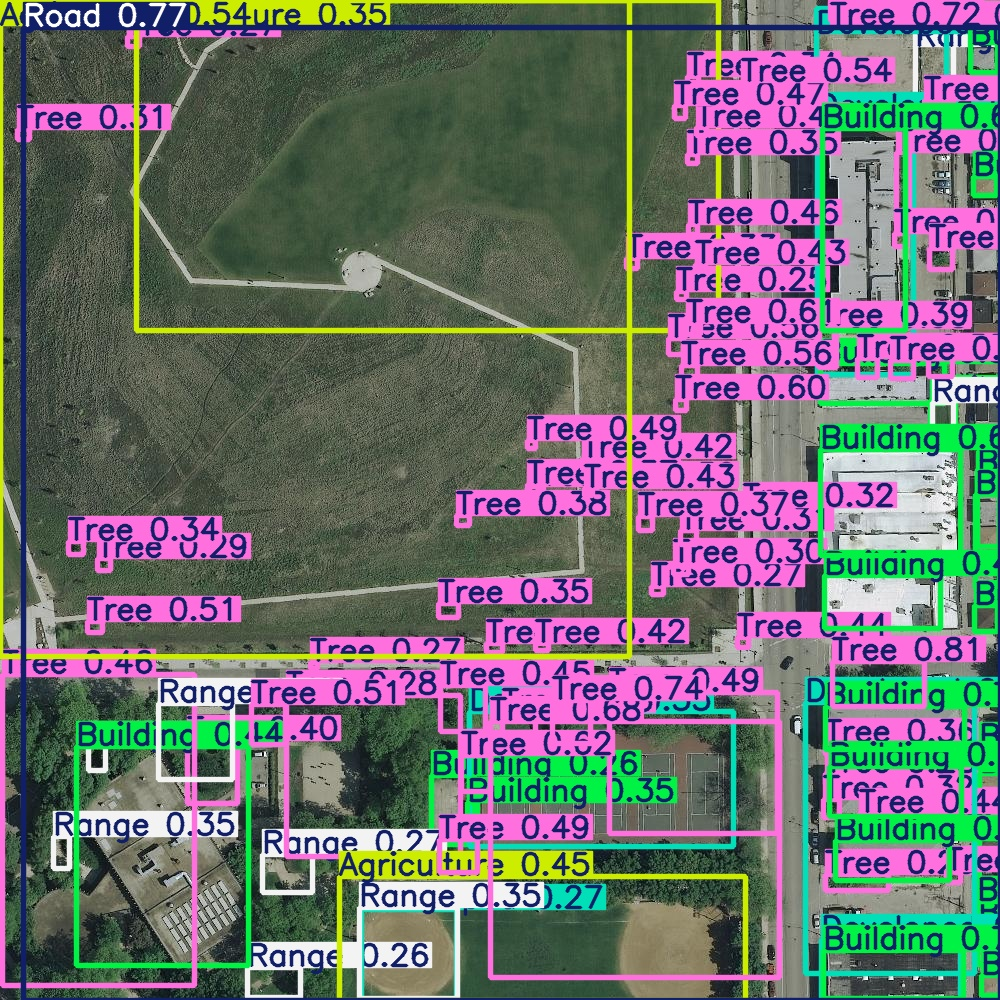

In [1]:
from IPython.display import Image, display
import glob

# Run inference
!python detect.py --weights runs/train/yolo_lessgo/weights/best.pt --img 640 --conf 0.25 --source /home/arismita/Downloads/k1.jpeg

# Display results
image_paths = glob.glob('runs/detect/exp/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

detect: weights=['runs/train/yolo_lessgo/weights/best.pt'], source=/home/arismita/Downloads/b4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.18, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/arismita/Downloads/b4.jpg: 384x640 1 Range, 1 Developed, 1 Road, 10 Trees, 16 Buildings, 94.1ms
Speed: 0.5ms pre-process, 94.1ms inference, 67.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10


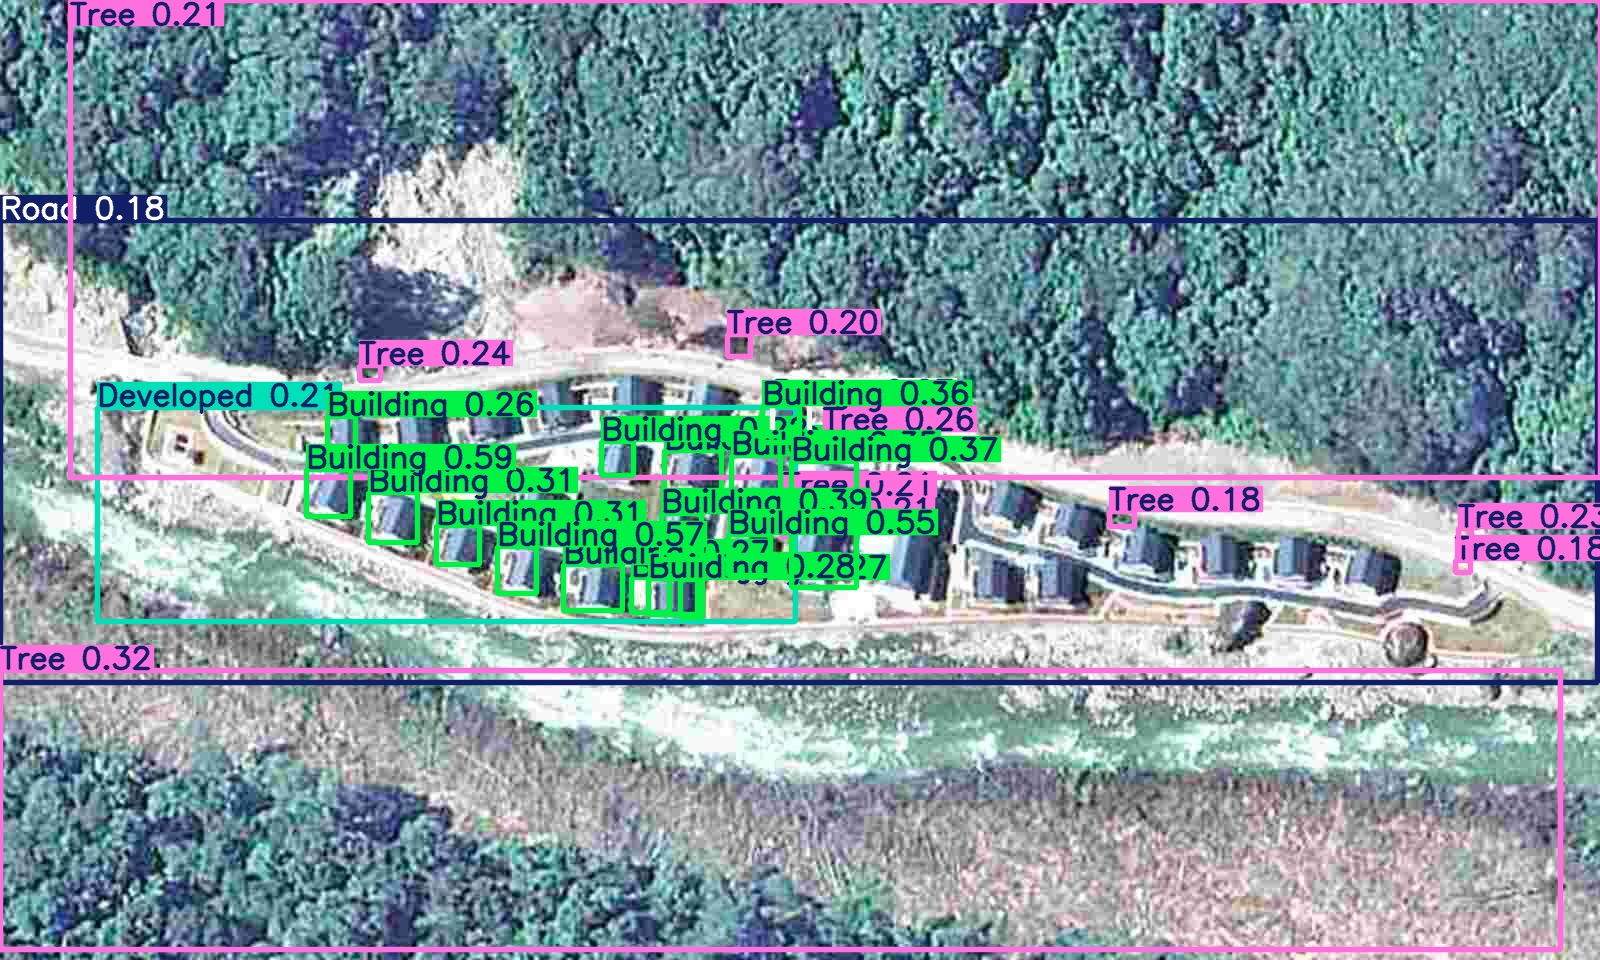

In [7]:
from IPython.display import Image, display
import glob

# Run inference
!python detect.py --weights runs/train/yolo_lessgo/weights/best.pt --img 640 --conf 0.18 --source /home/arismita/Downloads/b4.jpg

# Display results
image_paths = glob.glob('runs/detect/exp10/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

detect: weights=['runs/train/yolo_lessgo/weights/best.pt'], source=/home/arismita/Downloads/b4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/arismita/Downloads/b4.jpg: 384x640 1 Range, 1 Developed, 7 Trees, 15 Buildings, 85.6ms
Speed: 0.4ms pre-process, 85.6ms inference, 69.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12


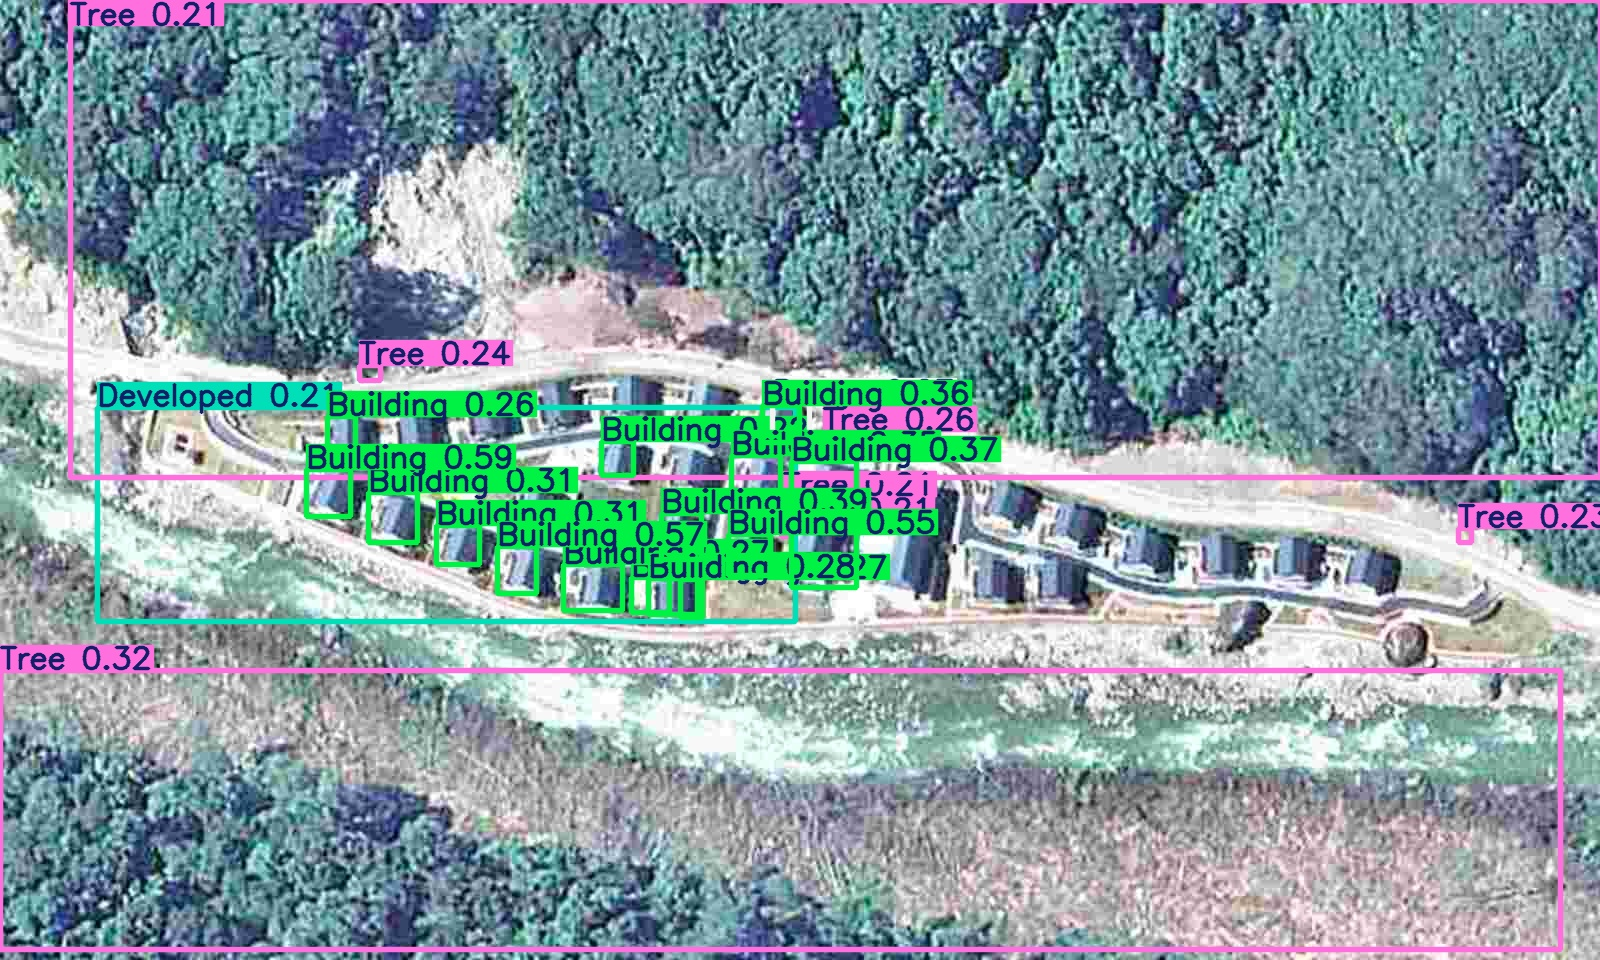

In [9]:
from IPython.display import Image, display
import glob

# Run inference
!python detect.py --weights runs/train/yolo_lessgo/weights/best.pt --img 640 --conf 0.20 --source /home/arismita/Downloads/b4.jpg

# Display results
image_paths = glob.glob('runs/detect/exp12/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

detect: weights=['runs/train/yolo_lessgo/weights/best.pt'], source=/home/arismita/Downloads/b4.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/arismita/Downloads/b4.jpg: 384x640 1 Range, 1 Developed, 7 Trees, 15 Buildings, 148.4ms
Speed: 0.6ms pre-process, 148.4ms inference, 75.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14


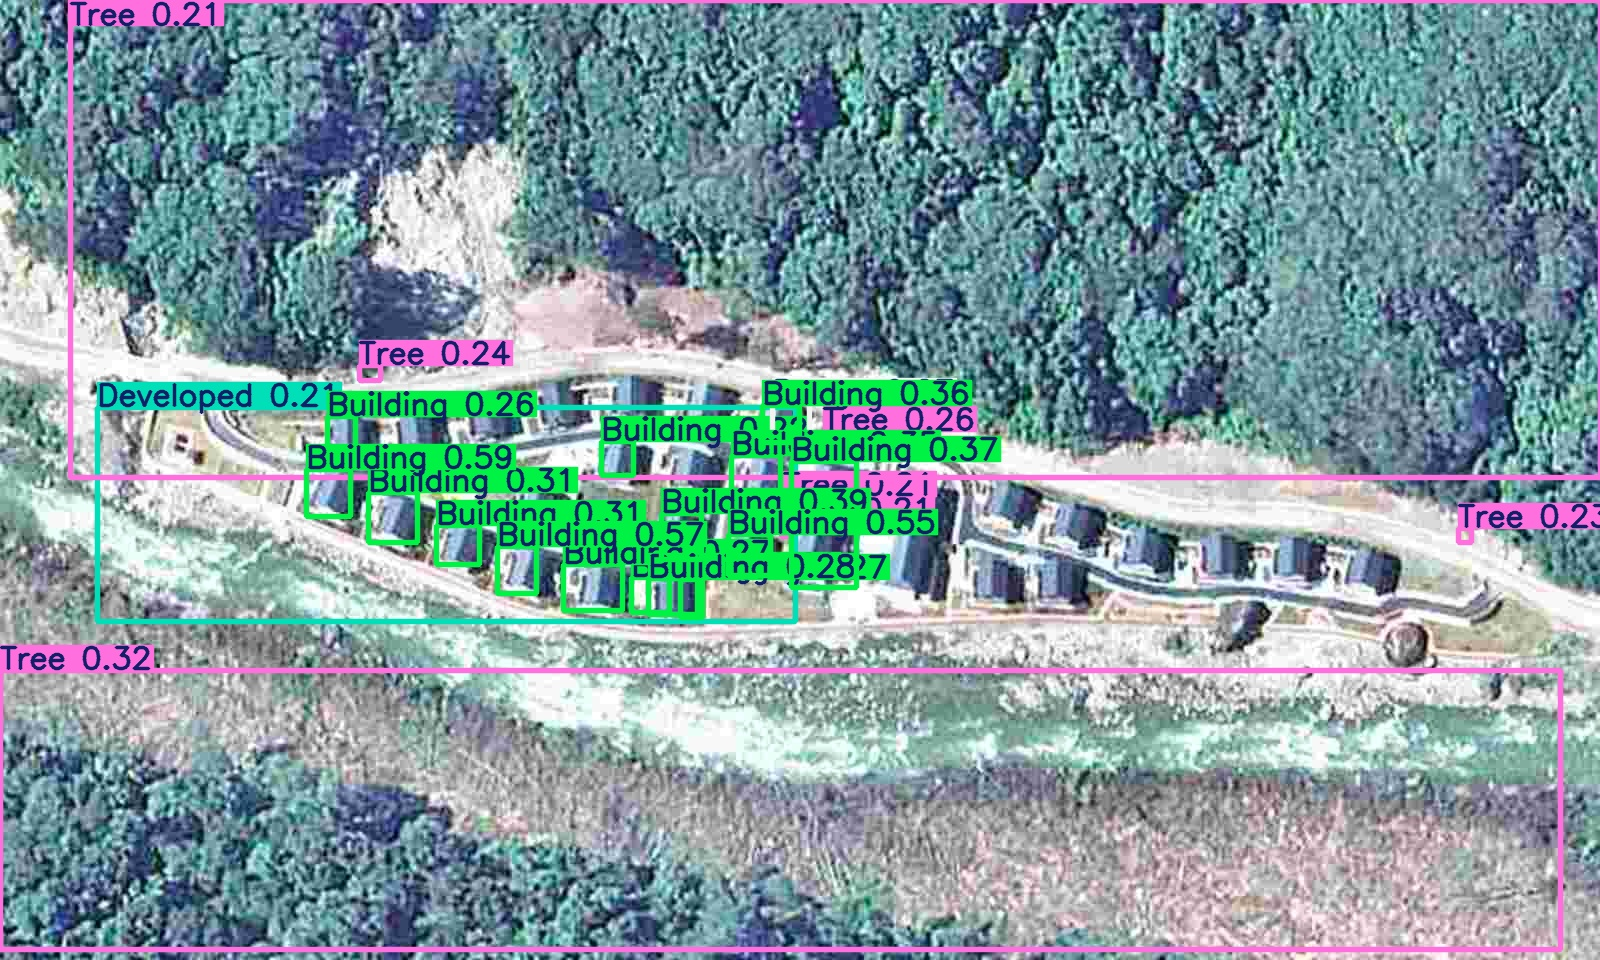

In [11]:
from IPython.display import Image, display
import glob

# Run inference
!python detect.py --weights runs/train/yolo_lessgo/weights/best.pt --img 640 --conf 0.20 --source /home/arismita/Downloads/b4.jpg

# Display results
image_paths = glob.glob('runs/detect/exp14/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

detect: weights=['runs/train/yolo_lessgo/weights/best.pt'], source=/home/arismita/Downloads/b5.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.8.19 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3686MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/arismita/Downloads/b5.jpg: 384x640 4 Trees, 34 Buildings, 195.3ms
Speed: 0.5ms pre-process, 195.3ms inference, 65.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp17


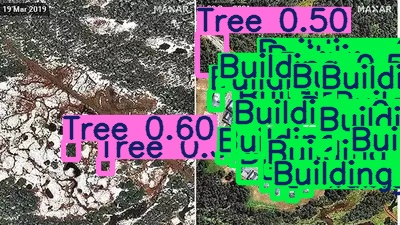

In [16]:
from IPython.display import Image, display
import glob

# Run inference
!python detect.py --weights runs/train/yolo_lessgo/weights/best.pt --img 640 --conf 0.30 --source /home/arismita/Downloads/b5.jpg

# Display results
image_paths = glob.glob('runs/detect/exp17/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

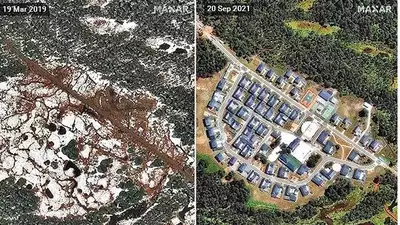

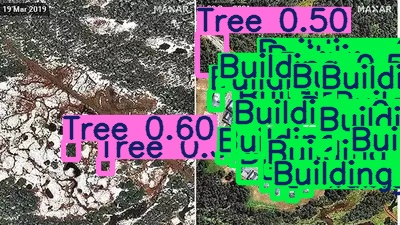

In [17]:
from IPython.display import Image, display
import glob

# Display results
image_paths = glob.glob('/home/arismita/Downloads/b5.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))

# Display results
image_paths = glob.glob('runs/detect/exp17/*.jpg')  # update if necessary

for img_path in image_paths:
    display(Image(filename=img_path))